# **Project: Mental Health in Tech Industry**

Author: Tomeka Pena

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#analysis">Statistical and Correlation Analysis</a></li>    
<li><a href="#conclusions">Overall Implication</a></li>
</ul>

## Introduction
#### This project will seek to answer the following research question
>**Is there a correlation between the availability of mental health resources and employees’ willingness to discuss mental health issues at work, and is there a difference in employee comfort levels in discussing mental health issues between those who know their mental health care options and those who do not?**

### Dataset Description

This project will be using a dataset called *Mental Health in Tech Survey: Survey on Mental Health in the Tech Workplace in 2014*, that is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. The dataset is provided by Kaggle and can be found here: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey  

Below are the columns included in the dataset along with its question in the survey:
 
>**Timestamp** (date and time survey was submitted)\
**Age** (age of survey participant)\
**Gender** (gender of survey participant)\
**Country:** What country do you live in?\
**state:** If you live in the United States, which state or territory do you live in?\
**self_employed:** Are you self-employed?\
**family_history:** Do you have a family history of mental illness?\
**treatment:** Have you sought treatment for a mental health condition?\
**work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?\
**no_employees:** How many employees does your company or organization have?\
**remote_work:** Do you work remotely (outside of an office) at least 50% of the time?\
**tech_company:** Is your employer primarily a tech company/organization?\
**benefits:** Does your employer provide mental health benefits?\
**care_options:** Do you know the options for mental health care your employer provides?\
**wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?\
**seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?\
**anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?\
**leave:** How easy is it for you to take medical leave for a mental health condition?\
**mental_health_consequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?\
**phys_health_consequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?\
**coworkers:** Would you be willing to discuss a mental health issue with your coworkers?\
**supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?\
**mental_health_interview:** Would you bring up a mental health issue with a potential employer in an interview?\
**phys_health_interview:** Would you bring up a physical health issue with a potential employer in an interview?\
**mental_vs_physical:** Do you feel that your employer takes mental health as seriously as physical health?\
**obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?\
**comments:** Any additional notes or comments

### A. Exploratory Data Analysis

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load survey dataset
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


At first glance, df.head() reveals the data set has 27 columns. It can be observed in the gender column that there are multiple ways that represent 'male' as a gender. Futher investigation on value '25-Jun' in column for number of employees (no_empleyees) is needed.

In [3]:
# Info on DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

There are 1259 total rows in the dataset. Majority of the rows have an object data type. Data conversion will be needed to be able to perform correlation analysis. Also, there are a few columns with null values. Further investigation into null values are needed.

In [4]:
# Checking for null values
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

There are 515 or 40.9% null values in 'state' column. A possible cause could be from the survery containing participants from various countries outside the United States. I will not drop rows with null values in 'state' column until after further investigation is done. However, I will be dropping 'work_interfere' and 'comments' during the data cleaning process because they are not relevant to the research question. I will now count the occurance of countries other than the United States to see if there is a relation to the null values in the 'state' column.

In [5]:
# Country count
df['Country'].value_counts()

Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Finland                     3
Mexico                      3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Slovenia                    1
Costa Rica                  1
Latvia                      1
Uruguay                     1
Sp

In [6]:
# Filter the DataFrame for countries not equal to 'United States'
non_us_countries = df[df['Country'] != 'United States']

# Get the total count of non-US countries
non_us_count = non_us_countries.shape[0]

# Display the result
print("Number of rows where country is not United States:", non_us_count)

Number of rows where country is not United States: 508


In [7]:
# Filter the rows where 'Country' is 'United States' and 'state' is null
us_no_state_count = df[(df['Country'] == 'United States') & (df['state'].isnull())].shape[0]

# Display the result
print("Number rows where country is United States and state is null:", us_no_state_count)


Number rows where country is United States and state is null: 11


There are 508 total participants from countries other than the United States and there are 11 participants in the United States with null values. This could be due to them living in Washington, DC which is not classified as a state. Additionally, the sum of 'non_us_countries' and 'us_no_state_count' is 519 and results in 4 rows who should have null values in the 'state' column. I will now find the rows that should have null values.

In [8]:
# Filter for countries not equal to 'United States' and where 'state' is not null
non_us_with_state = df[(df['Country'] != 'United States') & (df['state'].notnull())]

# Get the count of such rows
non_us_with_state_count = non_us_with_state.shape[0]

# Display the count
print("Number of countries that are not the United States but have a state listed:", non_us_with_state_count)


Number of countries that are not the United States but have a state listed: 4


In [9]:
# Display non-US countries with a state
non_us_with_state

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
319,8/27/2014 14:28,29,male,Latvia,NY,No,No,No,NaN,26-100,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN
488,8/27/2014 16:21,26,Male,Israel,MD,No,No,No,Sometimes,25-Jun,...,Very easy,Maybe,No,Some of them,Yes,No,Maybe,Yes,No,Israel has public health insurance for everyon...
989,8/29/2014 9:10,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,5-Jan,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,
1179,9/26/2014 10:05,25,female,Bulgaria,UT,No,No,Yes,Sometimes,26-100,...,Don't know,Maybe,Maybe,Yes,Some of them,Maybe,No,No,No,NaN


Row 989 responses in the columns of age, gender, country, state, and no_employees are not within expected range of responses and will be removed during the data cleansing process. The remaining 3 rows will also be removed as country and state do not line up with eachother. A possible reason is the 3 participates listed their home countries and could be on a work visa in the state listed.

## B. Data Cleaning

>For the data cleaning process, I will be dropping unrelated columns to the research question, handling null values, and converting the categorical data (such as 'Yes', 'No', 'Maybe') into numerical values for correlation analysis.

#### B.1. Drop Unrelated Columns

In [10]:
# Create new data frame with relevant columns
relevant_columns = ['Age', 'Gender', 'Country', 'state', 'care_options', 'seek_help', 'coworkers', 'supervisor', 'mental_health_interview']
df_clean = df[relevant_columns]

# Print rows to verify new data frame
df_clean.head(1)

,Age,Gender,Country,state,care_options,seek_help,coworkers,supervisor,mental_health_interview
0,37,Female,United States,IL,Not sure,Yes,Some of them,Yes,No


In [11]:
# Creates a copy of df_clean to perform data cleaning
df_clean_copy = df_clean.copy() 

In [12]:
# View columns in df_clean_copy to check if copied correctly
df_clean_copy.head(1)

,Age,Gender,Country,state,care_options,seek_help,coworkers,supervisor,mental_health_interview
0,37,Female,United States,IL,Not sure,Yes,Some of them,Yes,No


To answer the research question, the following column are needed: Age, Gender, Country, state, care_options, seek_help, coworkers, supervisor, and mental_health_interview. A new data frame with the required columns was created and a copy of the data frame was created to perform futher data cleaning and data analysis. The copy data frame will perserve the orginal data frame.

#### B.2. Handle Null Values

In [13]:
# View null values
df_clean_copy.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                      515
care_options                 0
seek_help                    0
coworkers                    0
supervisor                   0
mental_health_interview      0
dtype: int64

In [14]:
# Create a boolean mask for rows to drop
# Drop rows of non United States countries with values in 'state' column
condition = (df_clean_copy['Country'] != 'United States') & (df_clean_copy['state'].notnull())

# Drop rows where the condition is True
df_clean_copy = df_clean_copy[~condition]

# Reset index 
df_clean_copy = df_clean_copy.reset_index(drop=True)

In [15]:
# Confirm dropped rows
df_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1255 non-null   int64 
 1   Gender                   1255 non-null   object
 2   Country                  1255 non-null   object
 3   state                    740 non-null    object
 4   care_options             1255 non-null   object
 5   seek_help                1255 non-null   object
 6   coworkers                1255 non-null   object
 7   supervisor               1255 non-null   object
 8   mental_health_interview  1255 non-null   object
dtypes: int64(1), object(8)
memory usage: 88.4+ KB


In [16]:
# Filter for countries not equal to 'United States' and where 'state' is not null
non_us_with_state_drop = df_clean_copy[(df_clean_copy['Country'] != 'United States') & (df_clean_copy['state'].notnull())]

# Get the count of such rows
non_us_with_state_drop_count = non_us_with_state_drop.shape[0]

# Display the count
print("Number of rows with country in United States and state is not null:", non_us_with_state_drop_count)

Number of rows with country in United States and state is not null: 0


Total rows have been reduced from 1259 to 1255. Running a query for countries other than the United States that have a state returned 0, which confirms the 4 rows found during the exploratory analysis have been dropped. Next I will assign values to null values in 'state' where 'Country' is United States.

In [17]:
# Update rows where Country is 'United States' and state is null with 'DC'
df_clean_copy.loc[(df_clean_copy['Country'] == 'United States') & (df_clean_copy['state'].isnull()), 'state'] = 'DC'

In [18]:
# Check null values
df_clean_copy.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                      504
care_options                 0
seek_help                    0
coworkers                    0
supervisor                   0
mental_health_interview      0
dtype: int64

In [19]:
# Filter the DataFrame for countries not equal to 'United States'
non_us_countries = df_clean_copy[df_clean_copy['Country'] != 'United States']

# Get the total count of non-US countries
non_us_new_count = non_us_countries.shape[0]

# Display the result
print("Number of rows with country not United States:", non_us_new_count)

Number of rows with country not United States: 504


To resolve null values, I first began with deleting rows that should have null values in the 'state' column. These rows included the 4 rows that contained state values although the country was outside of the United States. I then proceeded to fill null values in 'state' column of rows where country is United States with DC. I made the assumption that the participants lived in Washington, DC and left the state question blank because Washington, DC is a district and not a state. This decision filled in the 11 null values that was previously found. After handling the null values, there are now 504 null values in the 'state' column that is attributed to the 504 non United States countries. My decision is to leave these cells null and will assign it a numerical value when converting the categorical data into numerical values for correlation analysis.

#### B-3. Convert Categorical Data

In the following steps, I will perform data normalization to ensure that all data entries in a column follow a consistent format. Afterwards, I will convert the categorical data into numerical values for correlation analysis. 

##### B-3.1 Data Normalization

In [20]:
# View unique values for 'Gender' column
df_clean_copy['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'p', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [21]:
# Perform data normalization on 'Gender' column

# List of unique values to be changed to 'Female'
change_to_female = ['female', 'f', 'Female', 'Woman', 'Femake', 'woman', 'Female ', 'cis-female/femme', 'Female (cis)', 'femail', 'Cis Female', 'F']
# Replace values with 'Female'
df_clean_copy['Gender'] = df_clean_copy['Gender'].replace(change_to_female, 'Female')

# List of unique values to be changed to 'Male'
change_to_male = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man']
# Replace values with 'Male'
df_clean_copy['Gender'] = df_clean_copy['Gender'].replace(change_to_male, 'Male')

# List of unique values to be changed to 'Other'
change_to_other = ['Male-ish', 'Trans-female', 'something kinda male?', 'queer/she/they', 'non-binary', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Trans woman', 'Neuter', 'Female (trans)',
       'queer', 'fluid', 'Genderqueer', 'p', 'ostensibly male, unsure what that really means']
# Replace values with 'Other'
df_clean_copy['Gender'] = df_clean_copy['Gender'].replace(change_to_other, 'Other')

In [22]:
# Check 'Gender' column only contains values Male, Female, or Other
df_clean_copy['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

All values in 'Gender' column have been changed to have one of the following values: Male, Female, Other

In [23]:
# Change country to Other if not United States or United Kingdom
df_clean_copy['Country'] = df_clean_copy['Country'].apply(lambda x: 'Other' if x not in ['United States', 'United Kingdom'] else x)

In [24]:
# Check 'Country' column only contains values United States, United Kingdom, or Other
df_clean_copy['Country'].unique()

array(['United States', 'Other', 'United Kingdom'], dtype=object)

All values in 'Country' column have been changed to have one of the following values: United State, United Kingdom, Other

In [29]:
# Check 'state' column for data normalization
df_clean_copy['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'DC', 'NM', 'OR', 'FL',
       'MN', 'MO', 'AZ', 'CO', 'GA', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

The 'state' column already has data normalization and does not require revising.

In [26]:
# Check 'care_options' column for data normalization
df_clean_copy['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

The 'care_options' column already has data normalization and does not require revising.

In [30]:
# Check 'seek_help' column for data normalization
df_clean_copy['seek_help'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

The 'seek_help column already has data normalization and does not require revising.

In [31]:
# Check 'coworkers' column for data normalization
df_clean_copy['coworkers'].unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

The 'coworkers' column already has data normalization and does not require revising.

In [32]:
# Check 'supervisor' column for data normalization
df_clean_copy['supervisor'].unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

The 'supervisor' column already has data normalization and does not require revising.

In [33]:
# Check 'mental_health_interview' column for data normalization
df_clean_copy['mental_health_interview'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

The 'mental_health_interview' column has data normalization and does not require revising.

##### B-3.2 Convert Categorical Data

In [34]:
# Convert columns to numerical values
df_clean_copy['gender_numeric'] = df_clean_copy['Gender'].map({'Other': 0, 'Male': 1, 'Female': 2})
df_clean_copy['country_numeric'] = df_clean_copy['Country'].map({'Other': 0, 'United States': 1, 'United Kingdom': 2})
df_clean_copy['care_options_numeric'] = df_clean_copy['care_options'].map({'Yes': 1, 'No': 0, 'Not sure': 2})
df_clean_copy['seek_help_numeric'] = df_clean_copy['seek_help'].map({'Yes': 1, 'No': 0, 'Don\'t know': 2})
df_clean_copy['coworkers_numeric'] = df_clean_copy['coworkers'].map({'Yes': 1, 'No': 0, 'Some of them': 2})
df_clean_copy['supervisor_numeric'] = df_clean_copy['supervisor'].map({'Yes': 1, 'No': 0, 'Some of them': 2})
df_clean_copy['mental_health_interview_numeric'] = df_clean_copy['mental_health_interview'].map({'Yes': 1, 'No': 0, 'Maybe': 2})

In [35]:
# Checks numerical conversion
df_clean_copy.head()

,Age,Gender,Country,state,care_options,seek_help,coworkers,supervisor,mental_health_interview,gender_numeric,country_numeric,care_options_numeric,seek_help_numeric,coworkers_numeric,supervisor_numeric,mental_health_interview_numeric
0,37,Female,United States,IL,Not sure,Yes,Some of them,Yes,No,2,1,2,1,2,1,0
1,44,Male,United States,IN,No,Don't know,No,No,No,1,1,0,2,0,0,0
2,32,Male,Other,NaN,No,No,Yes,Yes,Yes,1,0,0,0,1,1,1
3,31,Male,United Kingdom,NaN,Yes,No,Some of them,No,Maybe,1,2,1,0,2,0,2
4,31,Male,United States,TX,No,Don't know,Some of them,Yes,Yes,1,1,0,2,2,1,1


Data cleaning is completed and numerical values has been assigned to columns for correlation analysis.

### C. Statistical and Correlation Analysis

#### C.1 Research Question Part A
>#### Is there a correlation between the availability of mental health resources and employees’ willingness to discuss mental health issues at work?

For part A of the research question, the null hypothesis states that there is no correlation between the availability of mental health resources and employees' willingness to discuss mental health issues. The Pearson Correlation statistical test will be implored to evaluate the correlation between these two variables. The significance of the correlation will be assessed using a p-value, and an alpha value (α) of 0.05 will be used as the threshold for statistical significance.

In [36]:
# Correlation between availability of resources and willingness to discuss
correlation_with_coworkers = df_clean_copy[['care_options_numeric', 'seek_help_numeric', 'coworkers_numeric']].corr(method='pearson')
correlation_with_supervisor = df_clean_copy[['care_options_numeric', 'seek_help_numeric', 'supervisor_numeric']].corr(method='pearson')
correlation_with_interview = df_clean_copy[['care_options_numeric', 'seek_help_numeric', 'mental_health_interview_numeric']].corr(method='pearson')

# Display correlation matrices
print("Correlation Matrix with Coworkers:\n", correlation_with_coworkers, '\n')
print("Correlation Matrix with Supervisor:\n", correlation_with_supervisor, '\n')
print("Correlation Matrix with Interview:\n", correlation_with_interview)


Correlation Matrix with Coworkers:
                       care_options_numeric  seek_help_numeric  \
care_options_numeric              1.000000           0.250545   
seek_help_numeric                 0.250545           1.000000   
coworkers_numeric                 0.034163           0.024091   

                      coworkers_numeric  
care_options_numeric           0.034163  
seek_help_numeric              0.024091  
coworkers_numeric              1.000000   

Correlation Matrix with Supervisor:
                       care_options_numeric  seek_help_numeric  \
care_options_numeric              1.000000           0.250545   
seek_help_numeric                 0.250545           1.000000   
supervisor_numeric                0.094944           0.050237   

                      supervisor_numeric  
care_options_numeric            0.094944  
seek_help_numeric               0.050237  
supervisor_numeric              1.000000   

Correlation Matrix with Interview:
                          

In [37]:
# Calculate p-values for Pearson correlations
pearson_coworkers = stats.pearsonr(df_clean_copy['care_options_numeric'], df_clean_copy['coworkers_numeric'])
pearson_supervisor = stats.pearsonr(df_clean_copy['care_options_numeric'], df_clean_copy['supervisor_numeric'])
pearson_interview = stats.pearsonr(df_clean_copy['care_options_numeric'], df_clean_copy['mental_health_interview_numeric'])

print("\nPearson Correlation Results:")
print(f"Correlation with Coworkers: Coefficient = {pearson_coworkers[0]:.2f}, p-value = {pearson_coworkers[1]:.4f}")
print(f"Correlation with Supervisor: Coefficient = {pearson_supervisor[0]:.2f}, p-value = {pearson_supervisor[1]:.4f}")
print(f"Correlation with Mental Health Interview: Coefficient = {pearson_interview[0]:.2f}, p-value = {pearson_interview[1]:.4f}")


Pearson Correlation Results:
Correlation with Coworkers: Coefficient = 0.03, p-value = 0.2265
Correlation with Supervisor: Coefficient = 0.09, p-value = 0.0008
Correlation with Mental Health Interview: Coefficient = 0.01, p-value = 0.8462


In [38]:
# Compare p-values with alpha (0.05)
alpha = 0.05
if pearson_coworkers[1] < alpha:
    print("The correlation with coworkers is statistically significant.")
else:
    print("The correlation with coworkers is not statistically significant.")

if pearson_supervisor[1] < alpha:
    print("The correlation with supervisor is statistically significant.")
else:
    print("The correlation with supervisor is not statistically significant.")

if pearson_interview[1] < alpha:
    print("The correlation with mental health interview is statistically significant.")
else:
    print("The correlation with mental health interview is not statistically significant.")

The correlation with coworkers is not statistically significant.
The correlation with supervisor is statistically significant.
The correlation with mental health interview is not statistically significant.


#### C.1.1 Graphs and Visual Analysis

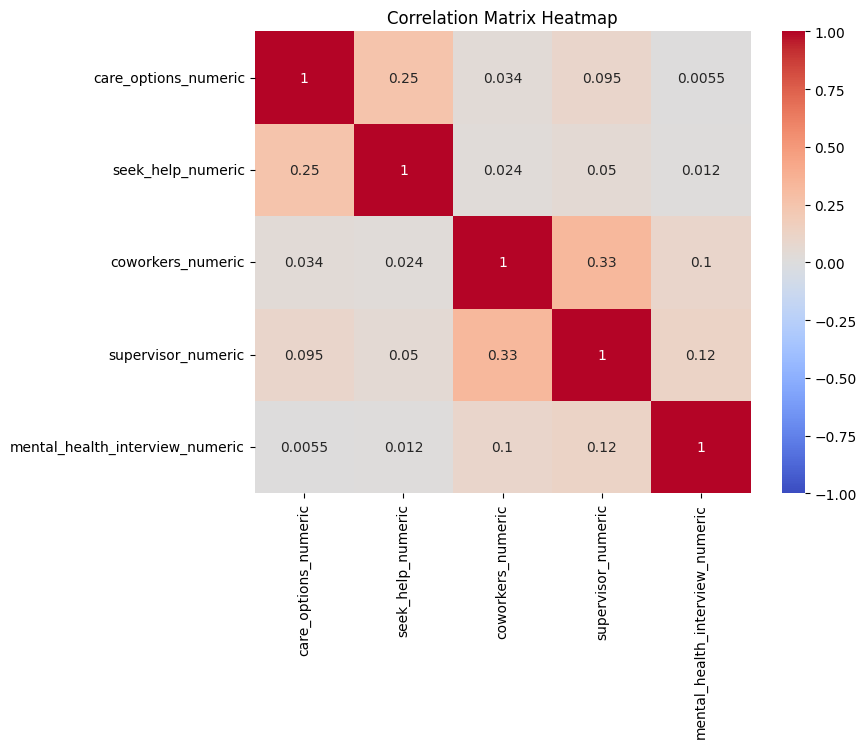

In [39]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean_copy[['care_options_numeric', 'seek_help_numeric', 'coworkers_numeric', 'supervisor_numeric', 'mental_health_interview_numeric']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

**Correlation Matrix Heatmap:** Shows correlations between mental health resources (care_options_numeric, seek_help_numeric) and willingness to discuss mental health issues with coworkers, supervisors, and in interviews.

### Research Question Part A Summary

>**Is there a correlation between the availability of mental health resources and employees’ willingness to discuss mental health issues at work?**

The following are the correlation results of the willingness to discuss mental health issues at work:

**Correlation with coworkers:** The correlation coefficient between the availability of mental health resources and comfort discussing mental health with coworkers is 0.03, with a p-value of 0.2265. This indicates a very weak positive correlation, which is not statistically significant since the p-value is greater than the significance level (alpha = 0.05). Thus, we fail to reject the null hypothesis that there is no correlation.

**Correlation with supervisor:** The correlation coefficient between the availability of mental health resources and comfort discussing mental health with a supervisor is 0.09, with a p-value of 0.0008. This indicates a weak positive correlation, which is statistically significant at alpha = 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant, though weak, correlation between the availability of mental health resources and willingness to discuss with a supervisor.

**Correlation with mental health interview:** The correlation coefficient between the availability of mental health resources and willingness to discuss mental health during an interview is 0.01, with a p-value of 0.8462. This indicates an extremely weak correlation, which is not statistically significant, as the p-value exceeds 0.05. We fail to reject the null hypothesis for this variable.

**Part A Summary Conclusion:** The analysis showed that there is a weak yet statistically significant correlation between the availability of mental health resources, such as knowing whether mental health care options are available or if employees are encouraged to seek help, and employees' comfort levels in discussing mental health issues with their supervisors. This means that, while the effect is small, employees who are aware of the mental health resources available to them feel more comfortable approaching their supervisors with mental health concerns. This finding suggests that supervisors play a crucial role in creating a supportive environment when it comes to mental health in the workplace. Since employees are more likely to feel comfortable discussing mental health issues with supervisors when they know mental health resources exist, organizations could benefit from promoting their mental health programs more actively, especially emphasizing the role supervisors can play in these conversations.

In contrast, no significant correlation was found between the availability of mental health resources and employees' comfort levels in discussing mental health with coworkers or during interviews. This may indicate that while formal resources and support systems can influence conversations with supervisors, who hold a position of authority and may directly impact employees’ work environment, these resources may not be as influential in less formal settings, such as discussions with peers or during job interviews. Conversations with coworkers are likely influenced by other factors, such as personal relationships, team dynamics, or workplace culture. Similarly, discussing mental health during an interview is a sensitive topic and may not be directly related to available resources but rather to perceived stigmas or concerns about professional reputation and job security.

#### **C.2 Research Question Part B**
>#### Is there a difference in employee comfort levels in discussing mental health issues between those who know their mental health care options and those who do not?

For part B of the research question, the null hypothesis states that there is no significant difference between the two groups in terms of comfort levels in discussing mental health issues at work. An independent t-test will be conducted to compare the comfort levels of employees in discussing mental health issues based on whether they know their mental health care options or not. The test will generate a t-statistic and a p-value to determine whether the difference in means between the two groups is statistically significant. As with the correlation test, an alpha value of 0.05 will be used to evaluate the significance of the result. 

In [40]:
# Split data based on knowledge of care options
knows_options = df_clean_copy[df_clean_copy['care_options_numeric'] == 1]  # For 'Yes' coded as 1
does_not_know_options = df_clean_copy[df_clean_copy['care_options_numeric'] != 1]  # For 'No' and 'Don't know'

In [41]:
# Calculate mean comfort level for both groups (coworkers and supervisor)
knows_coworkers_mean = knows_options['coworkers_numeric'].mean()
knows_supervisor_mean = knows_options['supervisor_numeric'].mean()

does_not_know_coworkers_mean = does_not_know_options['coworkers_numeric'].mean()
does_not_know_supervisor_mean = does_not_know_options['supervisor_numeric'].mean()

# Print the results
print("\nComfort level with coworkers (knows options):", knows_coworkers_mean)
print("Comfort level with coworkers (does not know options):", does_not_know_coworkers_mean)
print("Comfort level with supervisor (knows options):", knows_supervisor_mean)
print("Comfort level with supervisor (does not know options):", does_not_know_supervisor_mean)


Comfort level with coworkers (knows options): 1.416289592760181
Comfort level with coworkers (does not know options): 1.4034440344403445
Comfort level with supervisor (knows options): 1.0226244343891402
Comfort level with supervisor (does not know options): 0.932349323493235


In [42]:
# Perform t-tests to compare comfort levels between the two groups
ttest_coworkers = stats.ttest_ind(knows_options['coworkers_numeric'], does_not_know_options['coworkers_numeric'], equal_var=False)
ttest_supervisor = stats.ttest_ind(knows_options['supervisor_numeric'], does_not_know_options['supervisor_numeric'], equal_var=False)

# Print the t-test results
print("\nT-test Results for Comfort Levels:")
print(f"T-test for coworkers comfort level: t-stat = {ttest_coworkers.statistic:.4f}, p-value = {ttest_coworkers.pvalue:.4f}")
print(f"T-test for supervisor comfort level: t-stat = {ttest_supervisor.statistic:.4f}, p-value = {ttest_supervisor.pvalue:.4f}")


T-test Results for Comfort Levels:
T-test for coworkers comfort level: t-stat = 0.2704, p-value = 0.7869
T-test for supervisor comfort level: t-stat = 2.0161, p-value = 0.0441


In [43]:
# Compare the t-test p-values with alpha
if ttest_coworkers.pvalue < alpha:
    print("The difference in comfort levels with coworkers is statistically significant.")
else:
    print("The difference in comfort levels with coworkers is not statistically significant.")

if ttest_supervisor.pvalue < alpha:
    print("The difference in comfort levels with supervisors is statistically significant.")
else:
    print("The difference in comfort levels with supervisors is not statistically significant.")

The difference in comfort levels with coworkers is not statistically significant.
The difference in comfort levels with supervisors is statistically significant.


#### C.2.1 Graphs and Visual Analysis

In [44]:
# Creates bar graph function
def plot_comfort_levels(df, group_col, numeric_cols, xlabel, ylabel, title):
    """
    Creates a bar graph showing mean comfort levels for coworkers and supervisors based on a grouping column.

    Parameters:
    - df: DataFrame containing the data.
    - group_col: Column to group by.
    - numeric_cols: List of numeric columns to plot.
    - xlabel: Label for the X-axis.
    - ylabel: Label for the Y-axis.
    - title: Title for the chart.
    """
    # Group by the specified column and calculate the mean
    group_means = df_clean_copy.groupby(group_col)[numeric_cols].mean()
    
    # Define positions of the bars
    labels = ['Comfort with Coworkers', 'Comfort with Supervisor']
    groups = group_means.index  # Extract unique groups from the groupby
    x = np.arange(len(labels))  # Create X-axis positions
    width = 0.25  # Width of each bar

    # Create the bar graph with different colors for each group
    fig, ax = plt.subplots()
    for i, group in enumerate(groups):
        ax.bar(x + i * width, group_means.loc[group], width, label=group)

    # Add labels, title, and ticks
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width / len(groups))  # Adjust X-axis ticks
    ax.set_xticklabels(labels)
    ax.legend(title=group_col, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot
    plt.tight_layout()
    plt.show()

##### Comfort Levels in Discussing Mental Health Issues

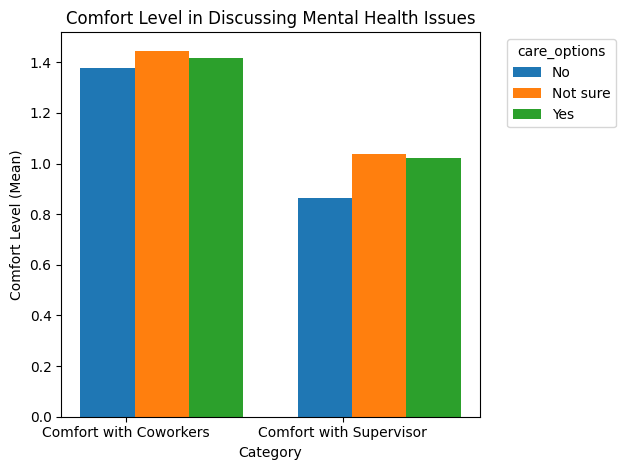

In [45]:
# Define the columns being grouped and plotted
group_col = 'care_options'  
numeric_cols = ['coworkers_numeric', 'supervisor_numeric']  

# Call the function to create the bar chart
plot_comfort_levels(
    df=df_clean_copy,  
    group_col=group_col,  
    numeric_cols=numeric_cols,  
    xlabel='Category',  
    ylabel='Comfort Level (Mean)',  
    title='Comfort Level in Discussing Mental Health Issues'  
)

***Analysis-*** This bar graph confirms that although there is a difference in the comfort levels discussing with coworkers from those who know their care options versus those who do not, the difference is not large enough to be statistically significant. Likewise, the graph also confirms that the difference in the comfort levels discussing with a supervisor of those who know their care options versus those who do not is large enough to be statistically significant. 

##### Mean Comfort Levels by Gender

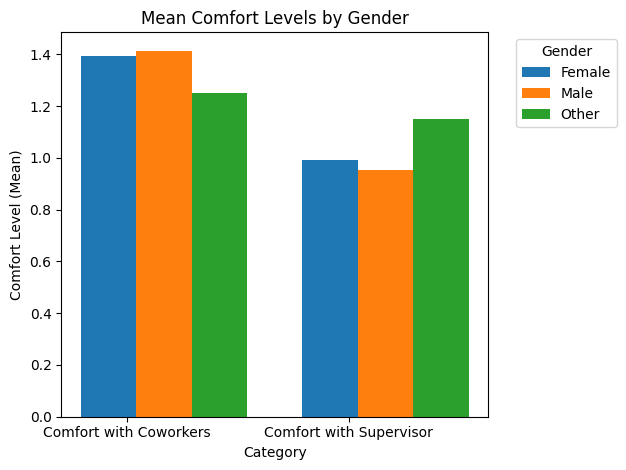

In [46]:
# Creates bar graph filtering comfort levels by gender
plot_comfort_levels(df_clean, 'Gender', ['coworkers_numeric', 'supervisor_numeric'], 
                    'Category', 'Comfort Level (Mean)', 'Mean Comfort Levels by Gender')

***Analysis-*** The bar graph shows that men are more comfortable with discussing mental health issues with their coworkers rather than discussing them with a supervisor. In addition, individuals who do not identify as male or female are more comfortable with discussing mental health issues with a supervisor at a significantly higher rate than individuals who identify as male or female. In contrast, those individuals are the least comfortable with discussing mental health issues with coworkers at a statistically significant rate.

##### Mean Comfort Levels by Country

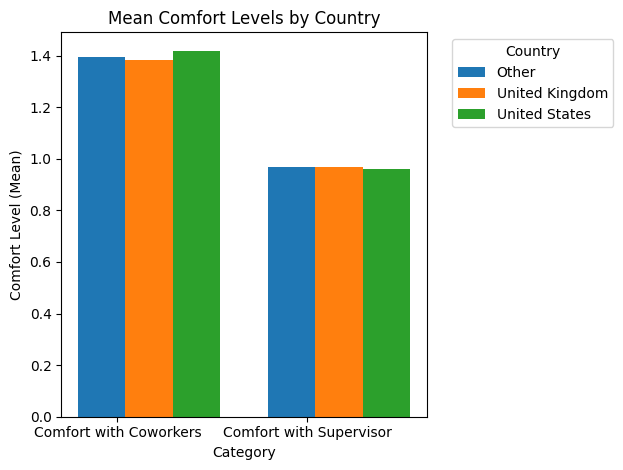

In [47]:
# Creates bar graph filtering comfort levels by country
plot_comfort_levels(df_clean, 'Country', ['coworkers_numeric', 'supervisor_numeric'], 
                    'Category', 'Comfort Level (Mean)', 'Mean Comfort Levels by Country')

***Analysis-*** The bar graph shows that in all of the countries, participants are more willing to discuss mental health issues with coworkers than with a supervisor. The United State has a slightly higher mean comfort level than other countries, but the difference is not statistically significant. In comparison, there is not a statistically significant difference in comfort levels with a supervisor between the different countries. This finding suggests that a person's country does not statistically affects the comfort level of an individual to discuss mental health issues at work.

### Summary for Research Question Part 2:

>**Is there a difference in employee comfort levels in discussing mental health issues between those who know their mental health care options and those who do not?**

The following are the results of the comfort level in discussing mental health issues of employees who know/don't know their care options:

**Comfort level with coworkers:** The mean comfort level for employees who know their mental health care options is 1.42, while the mean comfort level for those who do not know their options is 1.40. A t-test comparing the two groups yields a t-statistic of 0.2704 and a p-value of 0.7869. Since the p-value is greater than 0.05, the difference in comfort levels with coworkers is not statistically significant, indicating that knowledge of mental health care options does not significantly impact comfort levels when discussing mental health issues with coworkers.

**Comfort level with supervisor:** The mean comfort level for employees who know their mental health care options is 1.02, while for those who do not, it is 0.93. A t-test yields a t-statistic of 2.0161 and a p-value of 0.0441. Since the p-value is less than 0.05, the difference in comfort levels with supervisors is statistically significant, suggesting that employees who know their mental health care options feel significantly more comfortable discussing mental health issues with their supervisors than those who do not.

**Part B Summary Conclusion:** The analysis of comfort levels in discussing mental health issues showed that there was no statistically significant difference in comfort when discussing these issues with coworkers between employees who knew about the availability of mental health care options and those who did not. This suggests that knowledge of formal mental health care resources does not impact an employee's willingness to have conversations about mental health with their coworkers. Discussions with coworkers are likely influenced by informal factors, such as personal relationships, mutual trust, or the overall workplace culture regarding mental health openness, rather than the presence of formal resources.

On the other hand, a significant difference was found in employees' comfort levels in discussing mental health issues with their supervisors based on their knowledge of mental health care options. Employees who knew their mental health care options felt more comfortable approaching their supervisors than those who did not. This could be because employees who are informed about their company’s mental health resources may perceive a more supportive environment, where their concerns will be understood, and help is accessible if needed. The formal acknowledgment of mental health by the organization, coupled with available resources, could lower the barriers for these employees to raise mental health concerns with their supervisors. 

In addition, when looking at comfort levels by gender, the bar graph indicates that men are generally more comfortable discussing mental health with coworkers than supervisors, while individuals who do not identify strictly as male or female report significantly higher comfort levels with supervisors but lower levels with coworkers. Furthermore, participants across all countries generally feel more at ease discussing mental health with coworkers compared to supervisors, with the United States showing a slightly higher mean comfort level, though not statistically significant. Overall, the data suggests that a person's country does not significantly influence their comfort level in discussing mental health at work.

## Overall Implication:
Together, these findings suggest that while the availability of mental health resources is essential, the impact of these resources varies depending on who the employee is speaking to. For interactions with supervisors, knowing about available resources makes a difference, potentially because of the power dynamics and the formal role supervisors play in managing employee well-being. However, for discussions with coworkers and during interviews, other factors beyond the availability of resources, such as workplace culture and personal relationships, may be more influential. 

The findings suggest that organizations should focus on both promoting resources and fostering an open and supportive culture to address mental health at all levels of the workplace. Organizations should not only make mental health resources available but should also actively communicate their existence to employees, particularly if they aim to improve comfort levels in discussions with supervisors. Additionally, efforts to promote mental health discussions with coworkers and during interviews may require a more holistic approach that extends beyond resources and into fostering a culture of openness, reducing stigma, and encouraging mental health discussions at all levels of the organization. This could include targeted mental health awareness campaigns, peer support systems, and leadership initiatives that model healthy mental health communication practices.

In [ ]:
# Save cleaned dataframe as a CSV file
df_clean_copy.to_csv('df_clean_copy.csv', index=False)